# Prediction of CO2 emissions from country-specific data

***
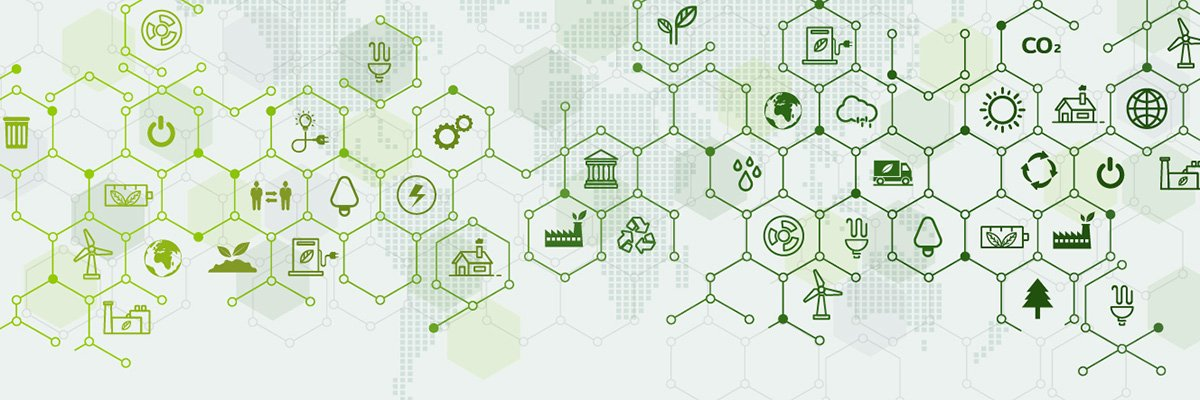
## Stage 2: Data exploration and visualization

***

### Notebook Contents:
0. Introduction
1. Notebook setup - libraries and data import, notes on the data source
2. Global data overview
3. Feature/column abbreviations and units
4. Definition of the hypothesis to be tested
5. Feature engineering
    - features overview
    - derivation of additional important features
    - removal of unnecessary features
6. Prepare the visualization
7. Create plots
    - a global look onto all relationships and detailed plots of chosen dependencies
    - correlation matrix heatmaps
    - scatterplots, histograms
    - detection of outliers
    - discussion of dependencies and trends
8. Conclusions

***

### 1. Import libraries and dataset :

In [61]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'cleaned_climate_data.csv')

### 2. Global overview of the available data

A global overview of the imported data yields the following insights:

In [62]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1327, 19)

In [63]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


Country code                                                      object
Year                                                               int64
cereal_yield_(kg_per_hectare)                                    float64
co2_emissions,_total_(ktco2)                                     float64
co2_emissions_per_capita_(metric_tons)                           float64
co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)         float64
energy_use_per_capita_(kilograms_of_oil_equivalent)              float64
energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)    float64
foreign_direct_investment,_net_inflows_(%_of_gdp)                float64
gdp_($)                                                          float64
gni_per_capita_(atlas_$)                                         float64
nationally_terrestrial_protected_areas_(%_of_total_land_area)    float64
population                                                       float64
population_growth_(annual_%)                       

In [64]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


Country code  Year  cereal_yield_(kg_per_hectare)  \
0          AGO  1998                          701.6   
1          ARE  1990                         2216.4   
2          ARE  1991                         1594.0   
3          ARE  1992                         2315.3   
4          ARE  1993                          858.5   

   co2_emissions,_total_(ktco2)  co2_emissions_per_capita_(metric_tons)  \
0                      7308.331                                0.556263   
1                     52009.061                               28.755863   
2                     57010.849                               29.851550   
3                     58136.618                               28.864884   
4                     65980.331                               31.097802   

   co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)  \
0                                         211.871013          
1                                         547.419170          
2                                         598.807980          
3                                         594.636182          
4                                         680.992757          

   energy_use_per_capita_(kilograms_of_oil_equivalent)  \
0                                         519.274349     
1                                       11258.132345     
2                                       12262.388130     
3                                       11058.790176     
4                                       11039.320754     

   energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)  \
0                                         197.782664               
1                                         214.318643               
2                                         245.977706               
3                                         227.818578               
4                                         241.743692               

   foreign_direct_investment,_net_inflows_(%_of_gdp)       gdp_($)  \
0                                          17.283736  6.445192e+09   
1                                          -0.344157  3.365323e+10   
2                                           0.076475  3.391964e+10   
3                                           0.366309  3.541269e+10   
4                                           1.122721  3.574530e+10   

   gni_per_capita_(atlas_$)  \
0                     460.0   
1                   20720.0   
2                   19340.0   
3                   19430.0   
4                   18550.0   

   nationally_terrestrial_protected_areas_(%_of_total_land_area)  population  \
0                                          12.399827              13138265.0   
1                                           0.266885               1808642.0   
2                                           0.266886               1909812.0   
3                                           0.266889               2014095.0   
4                                           0.267616               2121704.0   

   population_growth_(annual_%)  \
0                      2.669046   
1                      5.653214   
2                      5.442852   
3                      5.316516   
4                      5.204958   

   population_in_urban_agglomerations_>1million_(%)  \
0                                         17.421341   
1                                         26.135686   
2                                         26.377204   
3                                         26.656886   
4                                         26.964930   

   ratio_of_girls_to_boys_in_primary_&_secondary_school_(%)  \
0                                             82.045          
1                                            103.860          
2                                            104.111          
3                                            103.977          
4                                            103.984          

   under-five_mortality_rate_(per_1,000)  urban_population  \
0          

In [65]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


count          mean  \
Year                                                1327.0  2.000332e+03   
cereal_yield_(kg_per_hectare)                       1327.0  3.291647e+03   
co2_emissions,_total_(ktco2)                        1327.0  8.572976e+05   
co2_emissions_per_capita_(metric_tons)              1327.0  5.457996e+00   
co2_emissions_per_units_of_gdp_(kg/$1,000_of_20...  1327.0  4.737516e+02   
energy_use_per_capita_(kilograms_of_oil_equival...  1327.0  2.283099e+03   
energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_...  1327.0  2.369667e+02   
foreign_direct_investment,_net_inflows_(%_of_gdp)   1327.0  3.351709e+00   
gdp_($)                                             1327.0  1.027847e+12   
gni_per_capita_(atlas_$)                            1327.0  9.763997e+03   
nationally_terrestrial_protected_areas_(%_of_to...  1327.0  1.191688e+01   
population                                          1327.0  2.548719e+08   
population_growth_(annual_%)                        1327.0  1.316824e+00   
population_in_urban_agglomerations_>1million_(%)    1327.0  2.259888e+01   
ratio_of_girls_to_boys_in_primary_&_secondary_s...  1327.0  9.592591e+01   
under-five_mortality_rate_(per_1,000)               1327.0  4.231784e+01   
urban_population                                    1327.0  1.155340e+08   
urban_population_growth_(annual_%)                  1327.0  2.035628e+00   

                                                             std  \
Year                                                5.321946e+00   
cereal_yield_(kg_per_hectare)                       1.885281e+03   
co2_emissions,_total_(ktco2)                        3.042731e+06   
co2_emissions_per_capita_(metric_tons)              5.502212e+00   
co2_emissions_per_units_of_gdp_(kg/$1,000_of_20...  3.585085e+02   
energy_use_per_capita_(kilograms_of_oil_equival...  2.152786e+03   
energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_...  1.663571e+02   
foreign_direct_investment,_net_inflows_(%_of_gdp)   5.170648e+00   
gdp_($)                                             3.888092e+12   
gni_per_capita_(atlas_$)                            1.260601e+04   
nationally_terrestrial_protected_areas_(%_of_to...  9.227375e+00   
population                                          8.738267e+08   
population_growth_(annual_%)                        1.139622e+00   
population_in_urban_agglomerations_>1million_(%)    1.335883e+01   
ratio_of_girls_to_boys_in_primary_&_secondary_s...  9.327560e+00   
under-five_mortality_rate_(per_1,000)               4.567643e+01   
urban_population                                    3.909278e+08   
urban_population_growth_(annual_%)                  1.620392e+00   

                                                             min  \
Year                                                1.990000e+03   
cereal_yield_(kg_per_hectare)                       1.757000e+02   
co2_emissions,_total_(ktco2)                        7.077310e+02   
co2_emissions_per_capita_(metric_tons)              2.941071e-02   
co2_emissions_per_units_of_gdp_(kg/$1,000_of_20...  4.555259e+01   
energy_use_per_capita_(kilograms_of_oil_equival...  1.209964e+02   
energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_...  6.633537e+01   
foreign_direct_investment,_net_inflows_(%_of_gdp)  -1.502768e+01   
gdp_($)                                             9.826326e+08   
gni_per_capita_(atlas_$)                            9.000000e+01   
nationally_terrestrial_protected_areas_(%_of_to...  5.335002e-02   
population                                          1.628120e+06   
population_growth_(annual_%)                       -1.878577e+00   
population_in_urban_agglomerations_>1million_(%)    3.526316e+00   
ratio_of_girls_to_boys_in_primary_&_secondary_s...  4.829121e+01   
under-five_mortality_rate_(per_1,000)               3.200000e+00   
urban_population                                    1.103318e+06   
urban_population_growth_(annual_%)                 -2.295775e+00   

                      

### 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> <b> Variable name </b> </td>
        <td> <b> Description </b> </td>
        <td> <b> Unit </b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions per capita </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

In [66]:
print(data.columns)
print(data.index)
print(data.head())



Index(['Country code', 'Year', 'cereal_yield_(kg_per_hectare)',
       'co2_emissions,_total_(ktco2)',
       'co2_emissions_per_capita_(metric_tons)',
       'co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)',
       'energy_use_per_capita_(kilograms_of_oil_equivalent)',
       'energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)',
       'foreign_direct_investment,_net_inflows_(%_of_gdp)', 'gdp_($)',
       'gni_per_capita_(atlas_$)',
       'nationally_terrestrial_protected_areas_(%_of_total_land_area)',
       'population', 'population_growth_(annual_%)',
       'population_in_urban_agglomerations_>1million_(%)',
       'ratio_of_girls_to_boys_in_primary_&_secondary_school_(%)',
       'under-five_mortality_rate_(per_1,000)', 'urban_population',
       'urban_population_growth_(annual_%)'],
      dtype='object')
RangeIndex(start=0, stop=1327, step=1)
  Country code  Year  cereal_yield_(kg_per_hectare)  \
0          AGO  1998                          701.6   
1    

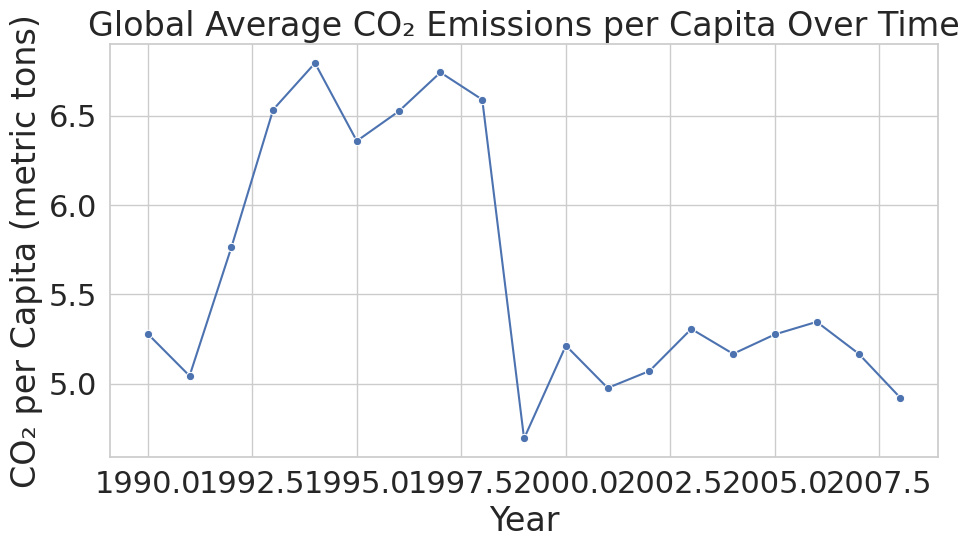

In [67]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('Year')['co2_emissions_per_capita_(metric_tons)'].mean().reset_index()

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # Unicode-friendly font

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly_avg, x='Year', y='co2_emissions_per_capita_(metric_tons)', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 **Key Components**

- **Blue Line with Markers**:  
  Represents the **mean CO₂ emissions per capita** globally for each year.

- **Shaded Blue Area (Confidence Band)**:  
  Indicates the **variation or uncertainty** (e.g., standard deviation or confidence interval) around the average.  
  A wider band means greater variability among countries in that year.

---

> 🧠 **Insights from the Chart**

1. **Overall Stability with Minor Fluctuations**  
   The global average remains relatively stable over time, ranging between **4.3 and 4.9 metric tons per capita**.

2. **Slight Increase (Early 1990s to Mid-1990s)**  
   From ~4.3 in 1991 to ~4.8 in 1994, showing modest global emission growth—possibly due to economic expansion post-Cold War.

3. **Plateau & Minor Dips (Late 1990s to 2008)**  
   Emission levels hover around 4.6–4.8 with minor year-to-year changes, indicating no strong global trend up or down during this period.

4. **High Country-Level Variability**  
   The **broad shaded area** suggests significant disparities in per capita CO₂ emissions across countries—developing vs. developed economies.

Despite some fluctuations, **global per capita CO₂ emissions remained largely steady** between 1991 and 2008, averaging ~4.6 metric tons.
However, the **wide range of values among countries** reveals that this average masks stark differences in national emissions profiles.
Some countries likely increased emissions while others improved or stabilized, balancing out the global trend.

---


#### 🌐 Total CO₂ Emissions vs Population – Chart

This scatter plot illustrates the relationship between a country's **total CO₂ emissions** and its **population**.


In [68]:
print(data.columns.tolist())


['Country code', 'Year', 'cereal_yield_(kg_per_hectare)', 'co2_emissions,_total_(ktco2)', 'co2_emissions_per_capita_(metric_tons)', 'co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)', 'energy_use_per_capita_(kilograms_of_oil_equivalent)', 'energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)', 'foreign_direct_investment,_net_inflows_(%_of_gdp)', 'gdp_($)', 'gni_per_capita_(atlas_$)', 'nationally_terrestrial_protected_areas_(%_of_total_land_area)', 'population', 'population_growth_(annual_%)', 'population_in_urban_agglomerations_>1million_(%)', 'ratio_of_girls_to_boys_in_primary_&_secondary_school_(%)', 'under-five_mortality_rate_(per_1,000)', 'urban_population', 'urban_population_growth_(annual_%)']


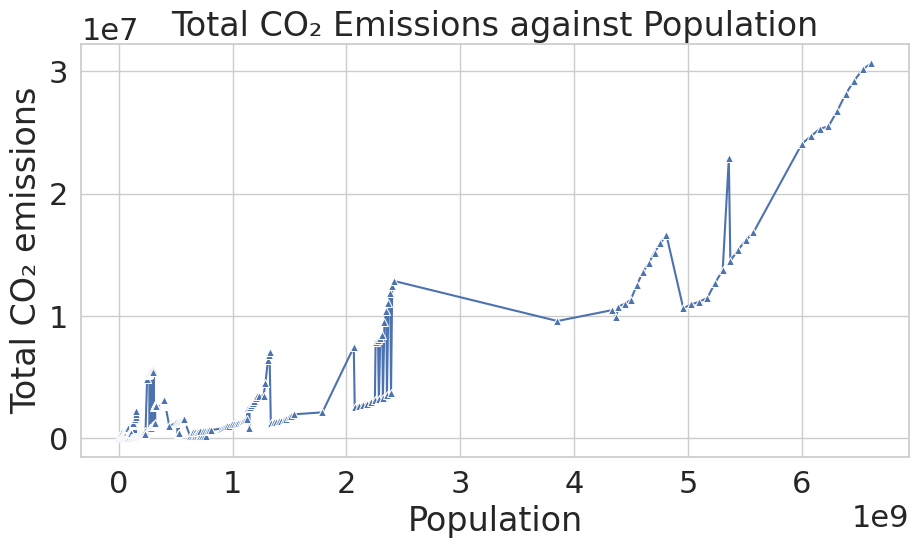

In [69]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='population', y='co2_emissions,_total_(ktco2)', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations** 🔍

1. **Positive Correlation**  
   There's a clear trend that **countries with larger populations tend to have higher total CO₂ emissions**.

2. **Steep Jumps at Key Population Ranges**  
   Noticeable vertical bands around:
   - ~1–1.5 billion (likely China)
   - ~1–1.4 billion (likely India)
   - ~300–400 million (e.g., USA)
   These could represent individual countries contributing large emissions due to both high population and industrial activity.

3. **High Variability at Similar Populations**  
   Some vertical streaks show countries with **similar populations but vastly different CO₂ emissions**, likely due to:
   - Differences in industrialization
   - Energy sources (renewable vs fossil fuels)
   - Economic structure and development

4. **Discontinuities or Gaps**  
   The sudden drops between points might indicate:
   - Missing data for some countries
   - Uneven time steps
   - Jumps between countries with very different sizes or emission levels


The chart strongly suggests that **population size is a significant driver of total CO₂ emissions**. However, **emissions per person can vary widely**, as countries with similar populations show vastly different total CO₂ outputs. This highlights the importance of not just population, but also energy policy, industrialization, and carbon efficiency when analyzing emissions data.

### 4. Hypothesis Definition

The dataset includes various country-level features categorized as:

- 🌍 **Emissions**: CO₂, CH₄, N₂O, etc.  
- 👥 **Population metrics**: total population, urban %, growth  
- 💰 **Economic indicators**: GDP, GNI, FDI  
- 🌾 **Land use**: cereal yield, agricultural land, protected areas  
- 🌦️ **Climate data**: precipitation, natural disasters  
- ⚡ **Energy use**  
- 🏥 **Health metrics**: medical personnel count  
- ...and others

---

#### 🎯 Project Goal

To explore how factors like economy, energy use, and land use influence emissions and climate indicators. Ultimately, develop a **predictive ML model** for emissions or climate data using the above features.

---

#### 📌 Hypothesis

> **CO₂ emissions are influenced by country-specific features** such as energy use, population metrics, GDP, FDI, and land use — and can be predicted from them.

In this study, **CO₂ emissions** will be treated as the **dependent variable**, and we’ll assess how it relates to other available features.

---

_Note: Some features were excluded due to high missingness during preprocessing._


***
### 5. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

   - per capita: *co2_per_cap* and *en_per_cap*
   - per unit of GDP: *co2_per_gdp* and *en_per_gdp*
   - total values: *co2_ttl*

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP *'en-er_gdp'* with the column *'gdp'* and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per  \\$1000 of GDP [kg oil eq./\\$1,000]).

Create a column for the total energy use:

In [70]:
print('energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)' in data.columns)
print('gdp_($)' in data.columns)
print(data[['energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)', 'gdp_($)']].head())



True
True
   energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)       gdp_($)
0                                         197.782664              6.445192e+09
1                                         214.318643              3.365323e+10
2                                         245.977706              3.391964e+10
3                                         227.818578              3.541269e+10
4                                         241.743692              3.574530e+10


In [71]:
# create a column for the total energy use
#data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000
data['en_ttl'] = data['energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)'] * data['gdp_($)'] / 1000



### Choosing the Best Unit for CO₂ Emissions & Energy Use

To determine the most meaningful unit for **CO₂ emissions** and **energy use**, we analyze their **correlations** with other variables.

🔍 **Goal**: Identify the units (e.g., per capita, total, per GDP) that show the **strongest and broadest correlations** with other country-level features.

This is achieved by examining the **correlation matrix** of all variables.


In [72]:
print(data.columns.tolist())


['Country code', 'Year', 'cereal_yield_(kg_per_hectare)', 'co2_emissions,_total_(ktco2)', 'co2_emissions_per_capita_(metric_tons)', 'co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)', 'energy_use_per_capita_(kilograms_of_oil_equivalent)', 'energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)', 'foreign_direct_investment,_net_inflows_(%_of_gdp)', 'gdp_($)', 'gni_per_capita_(atlas_$)', 'nationally_terrestrial_protected_areas_(%_of_total_land_area)', 'population', 'population_growth_(annual_%)', 'population_in_urban_agglomerations_>1million_(%)', 'ratio_of_girls_to_boys_in_primary_&_secondary_school_(%)', 'under-five_mortality_rate_(per_1,000)', 'urban_population', 'urban_population_growth_(annual_%)', 'en_ttl']


In [73]:
data = data.rename(columns={
    'Country code': 'country',
    'Year': 'year',
    'cereal_yield_(kg_per_hectare)': 'cereal_yield',
    'foreign_direct_investment,_net_inflows_(%_of_gdp)': 'fdi_perc_gdp',
    'gni_per_capita_(atlas_$)': 'gni_per_cap',
    'energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)': 'en_per_gdp',
    'energy_use_per_capita_(kilograms_of_oil_equivalent)': 'en_per_cap',
    'co2_emissions,_total_(ktco2)': 'co2_ttl',
    'co2_emissions_per_capita_(metric_tons)': 'co2_per_cap',
    'co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)': 'co2_per_gdp',
    'population_in_urban_agglomerations_>1million_(%)': 'pop_urb_aggl_perc',
    'nationally_terrestrial_protected_areas_(%_of_total_land_area)': 'prot_area_perc',
    'gdp_($)': 'gdp',
    'population_growth_(annual_%)': 'pop_growth_perc',
    'population': 'pop',
    'urban_population_growth_(annual_%)': 'urb_pop_growth_perc',
    'en_ttl': 'en_ttl'  # already simple but renaming to keep consistent
})


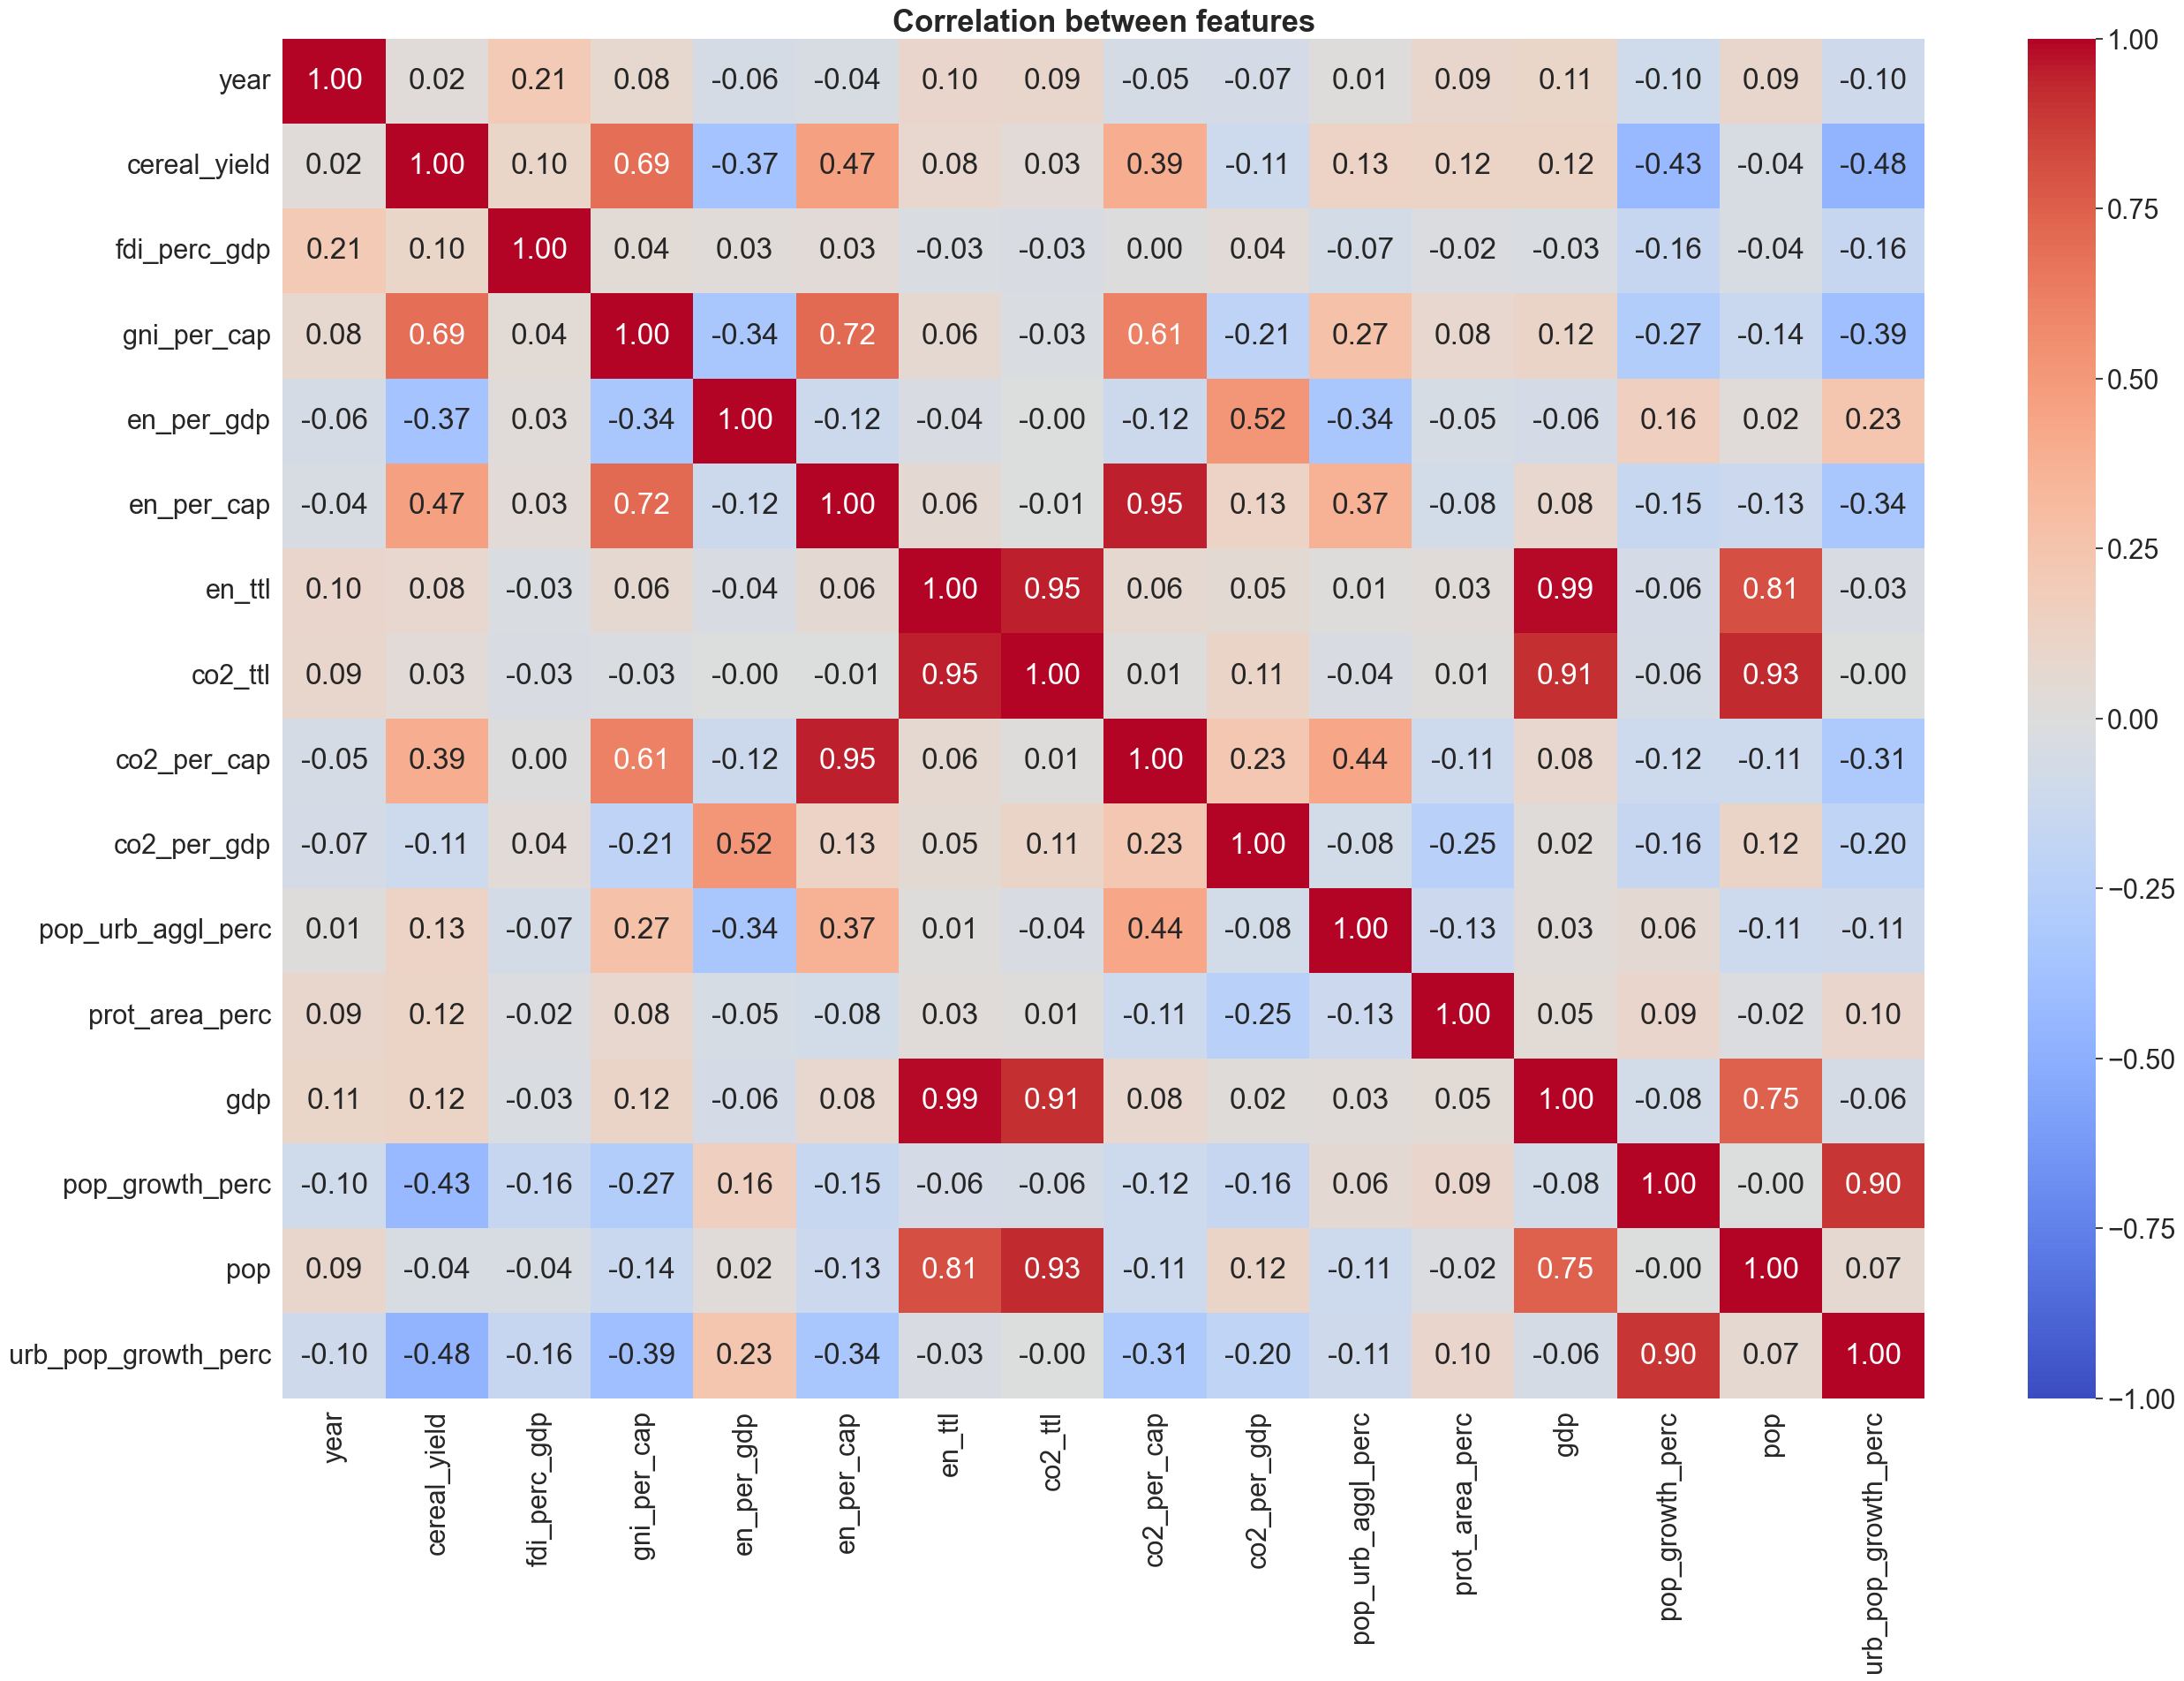

In [74]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f", 
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)


- When comparing the dependencies of co2_ttl, co2_per_cap, and co2_per_gdp with other features, **co2_per_cap** shows stronger correlations with more variables.

- It also reflects CO₂ emissions independent of population size, making it more useful for comparing countries of different sizes and populations.

- Since most chosen variables are already linked to population, including pop (population count) adds little value — this is also supported by its low correlation.

Based on this, the following features will be excluded from further analysis due to weak correlations: pop = -0.1, en_per_gdp = -0.1, en_ttl = 0.09, co2_per_gdp, and co2_ttl = 0.03.

In [75]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.568204
1         fdi_perc_gdp   0.992662
2          gni_per_cap   3.081362
3           en_per_cap  13.755509
4          co2_per_cap  11.722891
5    pop_urb_aggl_perc   1.089663
6       prot_area_perc   1.017829
7                  gdp   1.099981
8      pop_growth_perc   6.403460
9  urb_pop_growth_perc   5.752966


VIF values measure how much a feature's variance is inflated due to multicollinearity with other features:

- VIF < 5 → Low multicollinearity (generally safe)

- VIF 5–10 → Moderate multicollinearity (potential issue)

- VIF > 10 → High multicollinearity (problematic, should consider dropping or combining)

In [76]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

***

## 6. Prepare the visualizations

### Plotting preparation

#### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [77]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

#### Choose a subset of countries to plot
The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

In [78]:
# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BLR', 'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COG', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA',
       'ECA', 'ECU', 'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR',
       'GEO', 'GHA', 'GRC', 'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM',
       'KOR', 'KWT', 'LAC', 'LBN', 'LBY', 'LIC', 'LMC', 'LMY', 'MAR',
       'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NIC', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SRB', 'SSA', 'SWE', 'SYR',
       'TGO', 'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB',
       'VEN', 'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

#### CO₂ Emissions per Capita Over Time (Selected Countries)

This line chart illustrates the **CO₂ emissions per capita** (in metric tons) over time for five selected countries: **India (IND), New Zealand (NZL), Pakistan (PAK), USA, and Russia (RUS)**, spanning from the early 1990s to 2008.


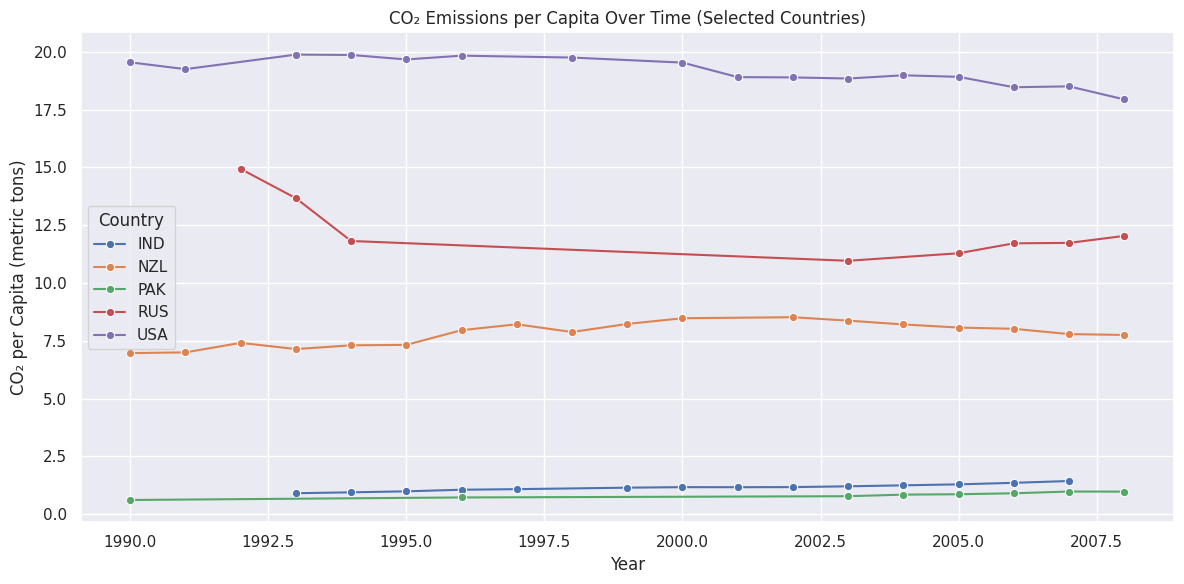

In [79]:
# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

#To fix UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:
- **USA** consistently records the highest per capita emissions, hovering around **19–20 metric tons**, though it shows a slight decline toward the end.
- **Russia (RUS)** shows a significant **decline in the early 1990s**, likely due to economic restructuring, and then stabilizes around **11–12 metric tons**.
- **New Zealand (NZL)** maintains a mid-level range, peaking around **9 metric tons**, then gradually declining.
- **India (IND)** and **Pakistan (PAK)** have the **lowest emissions per capita**, though both show **gradual upward trends**, indicating growing emissions with development.

#### Insight:
This comparison highlights stark differences in per capita emissions across developed and developing nations, and underscores the increasing trend in emissions for emerging economies like India and Pakistan.


In [80]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

***

## 7. Create plots and visualizations

The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

### A global look onto all relationships

Scatter plots of all chosen variables and countries will give a first impression of possible trends:

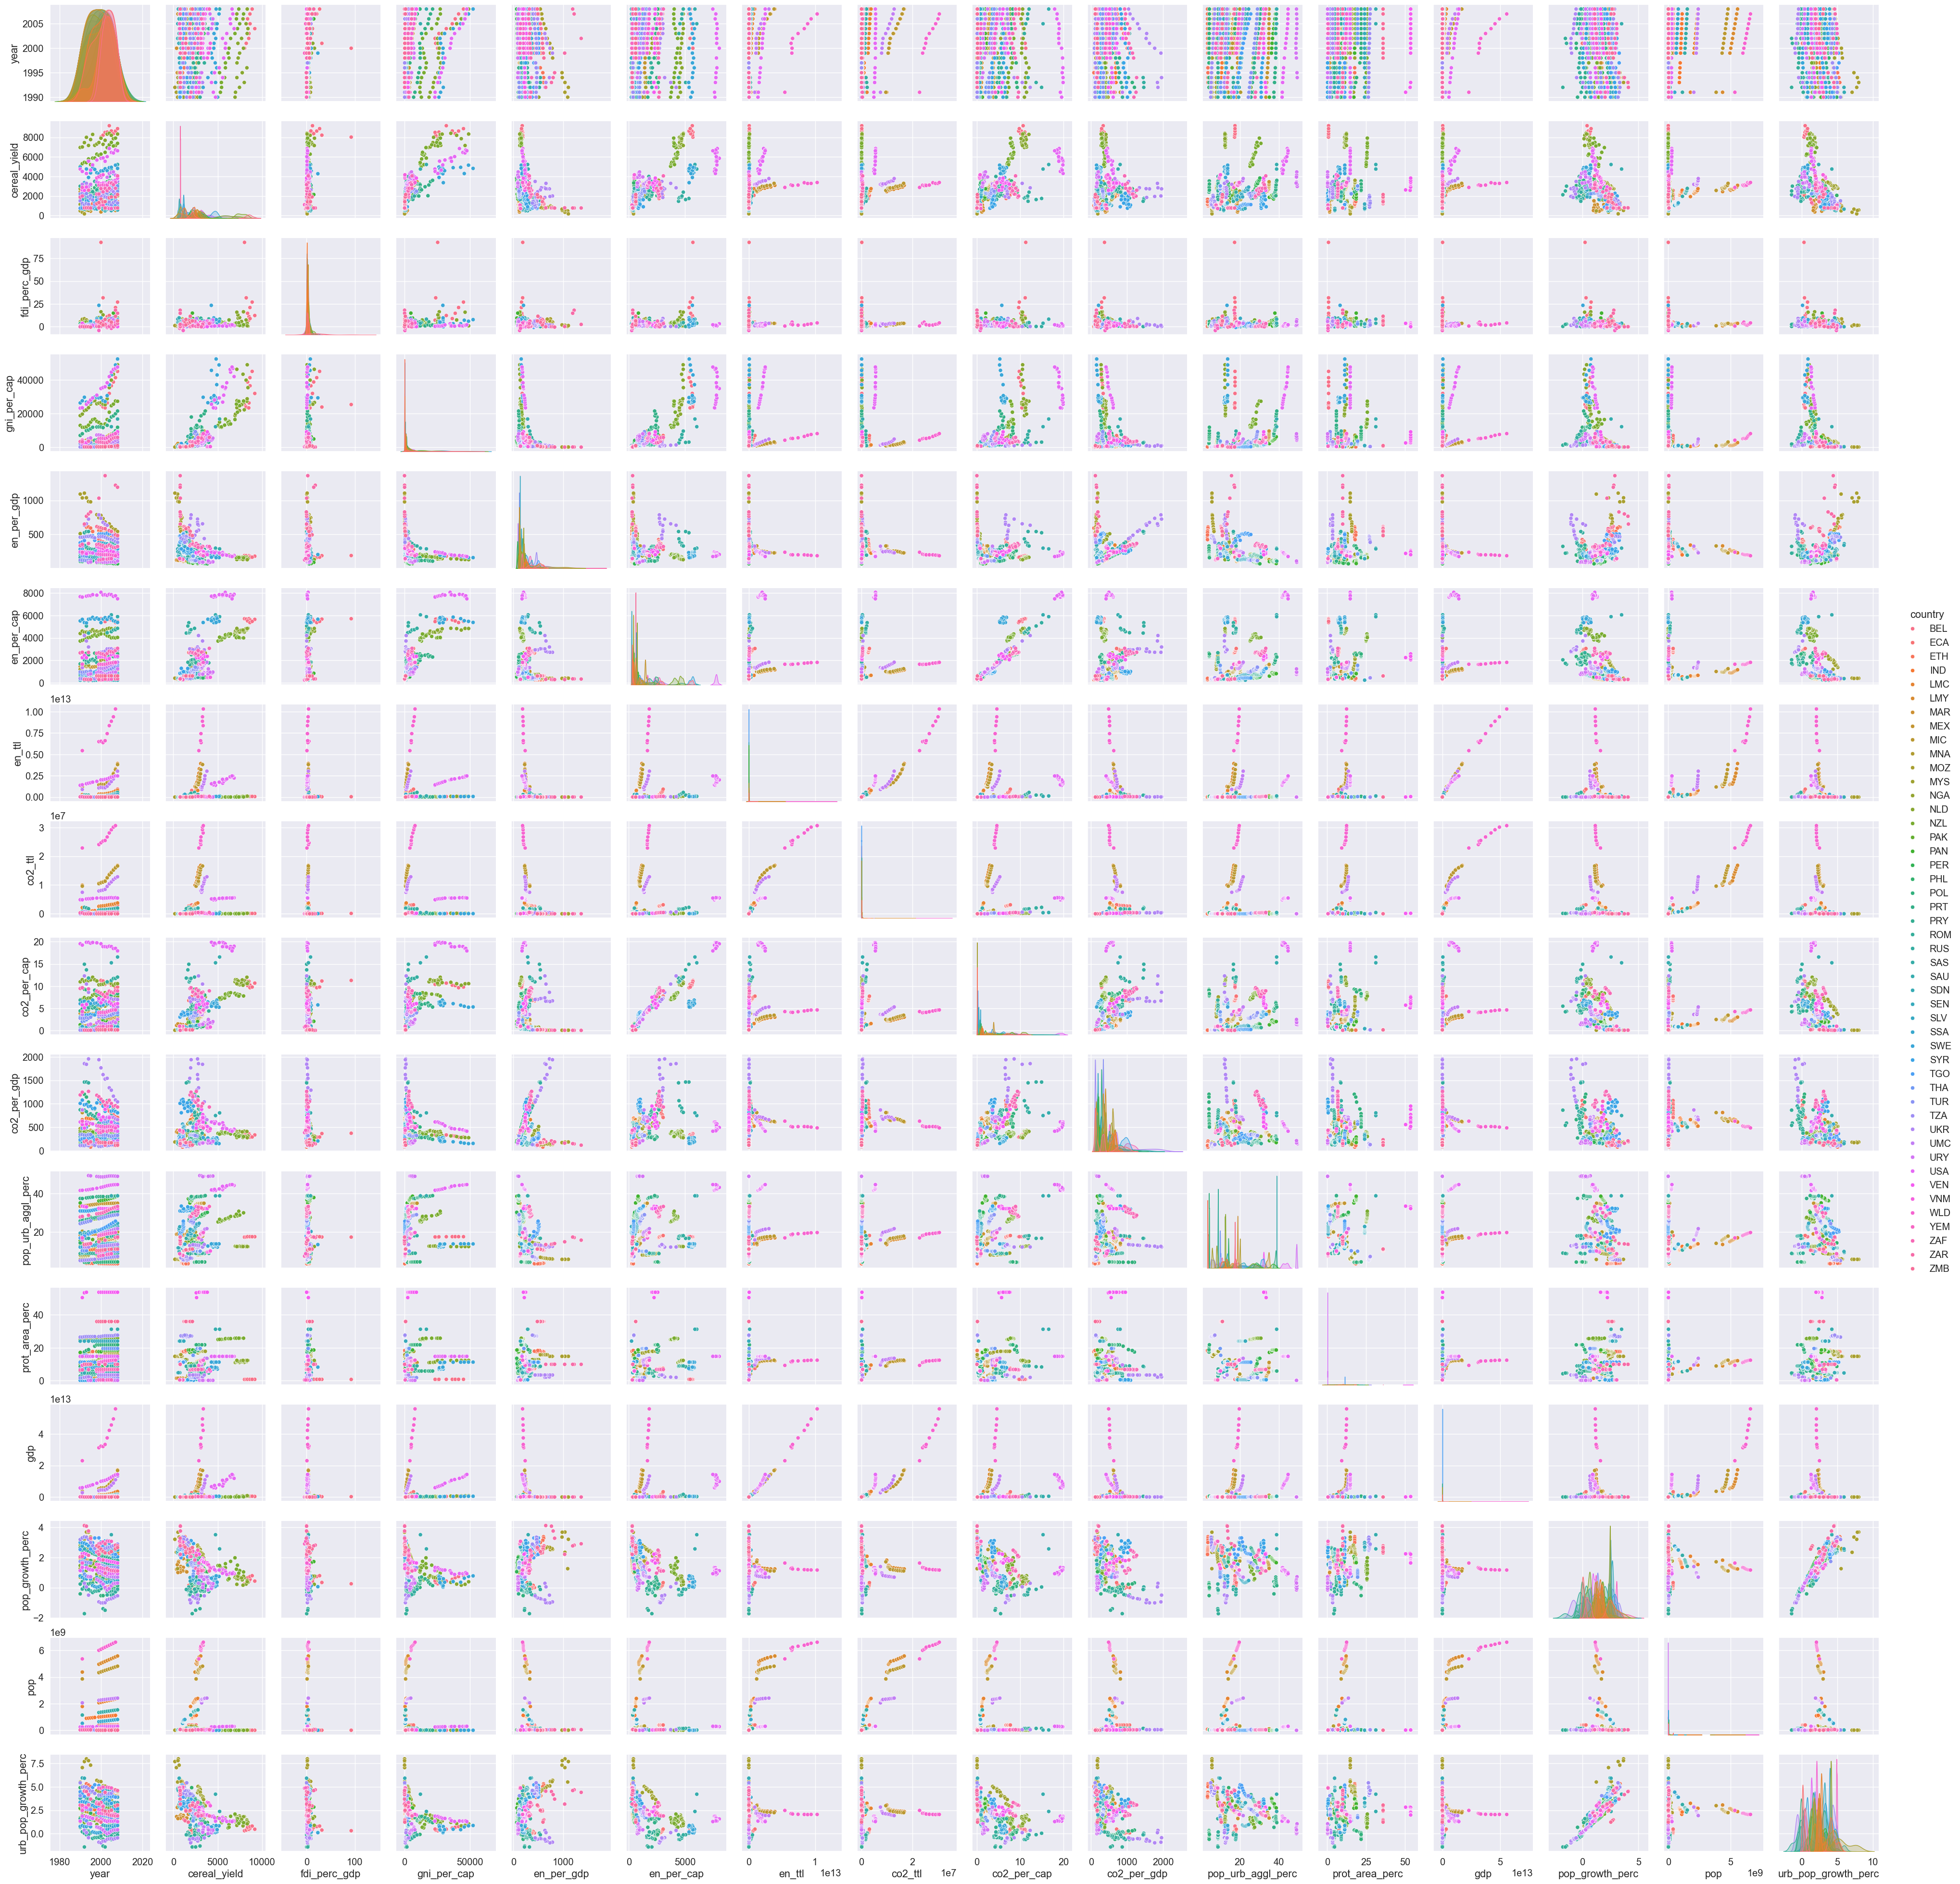

In [81]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

The most obvious linear dependency of co2_per_cap is with en_per_cap. Apparent hints for nonlinear relationships can be observed in the plots of *co2_per_cap* versus *gni*, *pop_urb_aggl_perc*, *pop_growth_perc*, *urb_pop_growth_perc*.




#### Notable Outliers: United Arab Emirates

Another significant observation is the cluster of orange outlier points with CO₂ emissions per capita ranging between **25 and 40 metric tons**, all attributed to the **United Arab Emirates (ARE)**. While there are other country-specific outliers, they do not substantially impact the overall trend.

To enhance clarity, **ARE data points were removed**, and the updated plots are presented below:


In [82]:
# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

After removing the outliers of a single country, the trends have become even more visible.

The following plot shows the relationsip between 4 variables:

Text(100.56874609375, 0.5, 'CO2 emissions per capita [t]')

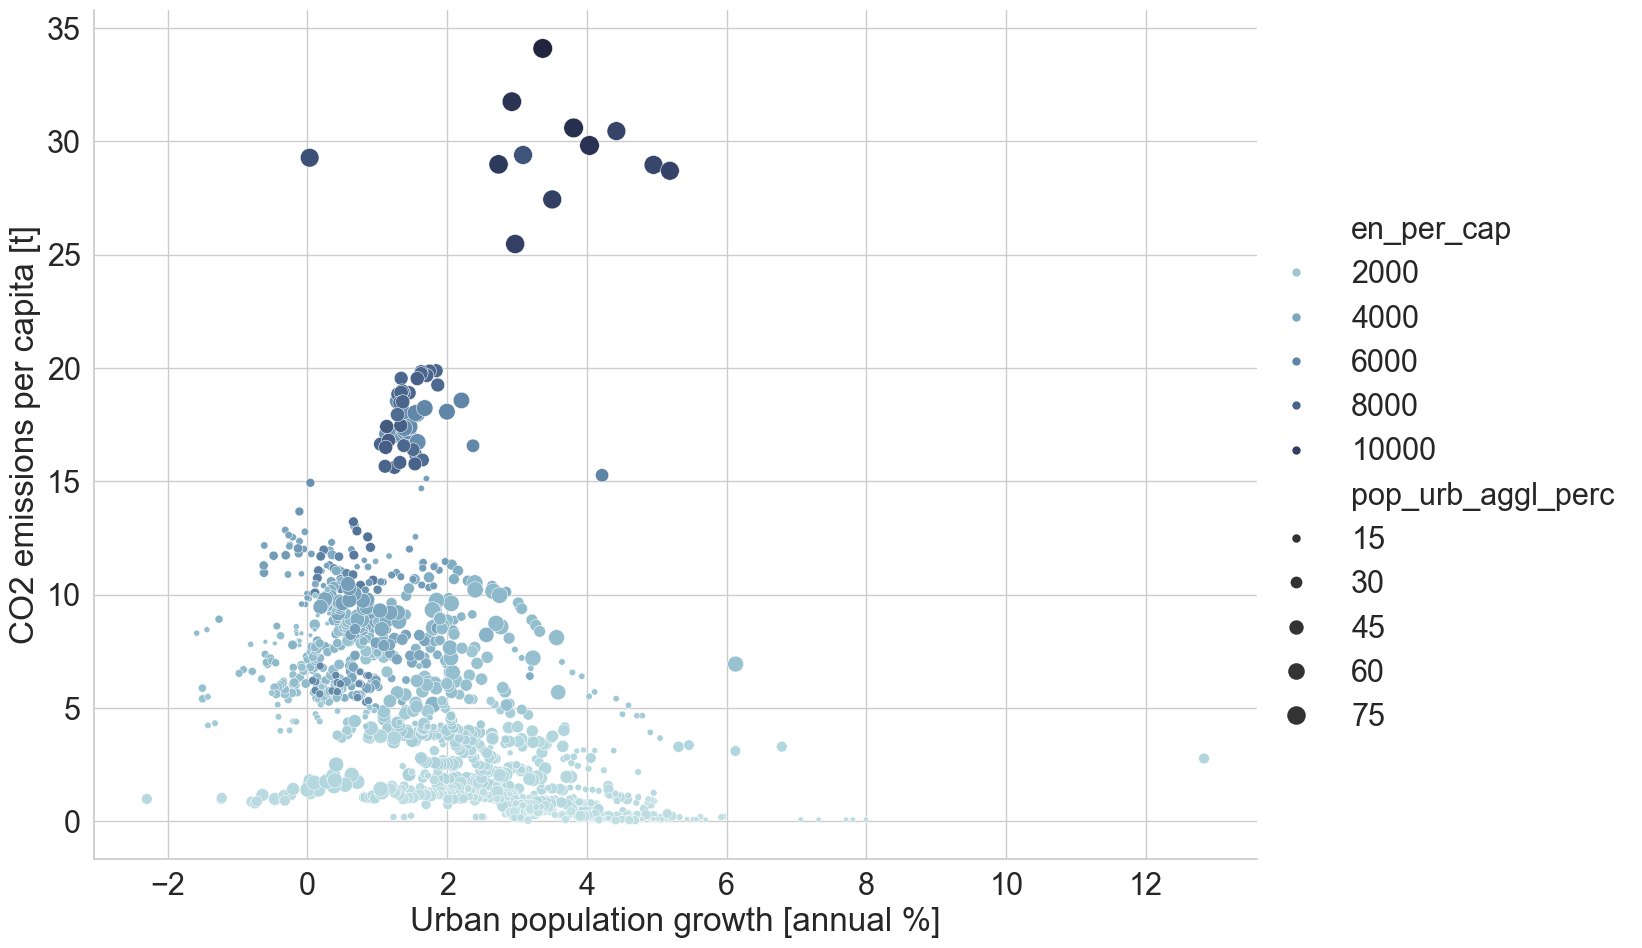

In [83]:
# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

***

#### **Conclusions**

Targeted plotting of key relationships has provided useful insights for predictive analysis:

* CO₂ emissions and energy use per capita are linked to more features and will be kept for further analysis.

* Population count is no longer relevant and will be removed.

* CO₂ emissions per capita show a strong linear relationship with energy use and nonlinear patterns with other variables.

* Both country-specific and overall global trends are visible. In some cases, global trends split into different paths for clusters of countries.

* Outlier groups, especially those from the United Arab Emirates (ARE), stand out from global patterns and should be considered when selecting data.

* The nonlinear nature of most relationships and the presence of country-based clusters suggest using machine learning models that handle nonlinearities and grouped data well (e.g., Random Forest), rather than those suited for purely linear patterns (e.g., Linear Regression).

***